# Exploratory Data Analysis (EDA) - Heliosgrid Intelligence Dataset

## 1. Introduction
This Jupyter Notebook performs an Exploratory Data Analysis (EDA) on the Heliosgrid Intelligence dataset. The primary goal of this analysis is to understand the structure, characteristics, and potential issues within the dataset, which contains meteorological and solar radiation data. This EDA will cover data loading, initial inspection, cleaning, preprocessing, and basic visualization to uncover patterns and insights.

## 2. Data Loading and Initial Inspection
In this section, we load the dataset and perform an initial inspection to understand its basic structure, data types, and summary statistics.

In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Configure pandas to display all columns
pd.set_option('display.max_columns', None)

In [10]:
# Load the dataset
try:
    initial_df = pd.read_csv('./producer/data/2022-1217132-one_axis.csv', sep=',', on_bad_lines='warn', skiprows=2)
    print("Dataset loaded successfully.")
except FileNotFoundError:
    print("Error: The file '2022-1217132-one_axis.csv' was not found. Please ensure it is in the correct path.")
    initial_df = pd.DataFrame() # Create an empty DataFrame to avoid further errors
except Exception as e:
    print(f"An error occurred during data loading: {e}")
    initial_df = pd.DataFrame()

if not initial_df.empty:
    print("\n### 2.1. First 5 Rows of the Dataset:")
    display(initial_df.head())

    print("\n### 2.2. Dataset Information:")
    initial_df.info()

    print("\n### 2.3. Summary Statistics for Numerical Columns:")
    display(initial_df.describe())

    print("\n### 2.4. Dataset Shape:")
    print(f"Rows: {initial_df.shape[0]}, Columns: {initial_df.shape[1]}")

Dataset loaded successfully.

### 2.1. First 5 Rows of the Dataset:


Year  Month  Day  Hour  Minute  Temperature  Clearsky DHI  Clearsky DNI  \
0  2022      1    1     0       0         26.8           0.0           0.0   
1  2022      1    1     1       0         26.7           0.0           0.0   
2  2022      1    1     2       0         26.6           0.0           0.0   
3  2022      1    1     3       0         26.5           0.0           0.0   
4  2022      1    1     4       0         26.4           0.0           0.0   

   Clearsky GHI  Cloud Type  Dew Point  DHI  DNI  Fill Flag  GHI  \
0           0.0         0.0       24.0  0.0  0.0        0.0  0.0   
1           0.0         0.0       24.0  0.0  0.0        0.0  0.0   
2           0.0         0.0       24.0  0.0  0.0        0.0  0.0   
3           0.0         0.0       23.8  0.0  0.0        0.0  0.0   
4           0.0         0.0       23.7  0.0  0.0        0.0  0.0   

   Relative Humidity  Solar Zenith Angle  Surface Albedo  Pressure  \
0              84.76             -9999.0            0.18    1009.0   
1              85.31             -9999.0            0.18    1009.0   
2              85.41             -9999.0            0.18    1009.0   
3              85.38             -9999.0            0.18    1009.0   
4              85.13             -9999.0            0.18    1009.0   

   Precipitable Water  Wind Direction  Wind Speed  Si (BPR)  Si (Wacker)  \
0                 3.9            37.0         5.6       0.0          0.0   
1                 3.8            40.0         6.0       0.0          0.0   
2                 3.7            42.0         6.3       0.0          0.0   
3                 3.6            44.0         6.6       0.0          0.0   
4                 3.6            46.0         6.7       0.0          0.0   

   Si (Eurosil)  GaAs (Bauhuis et al., 2009)  InGap (Gray, 2008)  \
0           0.0                          0.0                 0.0   
1           0.0                          0.0                 0.0   
2           0.0                          0.0                 0.0   
3           0.0                          0.0                 0.0   
4           0.0                          0.0                 0.0   

   InGap (McGambridge, 2011)  CdTe  Solar Azimuth Angle  Panel Tilt  \
0                        0.0   0.0           249.096443         NaN   
1                        0.0   0.0           249.622290         NaN   
2                        0.0   0.0           248.349240         NaN   
3                        0.0   0.0           243.612694         NaN   
4                        0.0   0.0           229.198565         NaN   

   Panel Azimuth Angle  0.2800 um  0.2805 um  0.2810 um  0.2815 um  0.2820 um  \
0                  NaN        0.0        0.0        0.0        0.0        0.0   
1                  NaN        0.0        0.0        0.0        0.0        0.0   
2                  NaN        0.0        0.0        0.0        0.0        0.0   
3                  NaN        0.0        0.0        0.0        0.0        0.0   
4                  NaN        0.0        0.0        0.0        0.0        0.0   

   0.2825 um  0.2830 um  0.2835 um  0.2840 um  0.2845 um  0.2850 um  \
0        0.0        0.0        0.0        0.0        0.0        0.0   
1        0.0        0.0        0.0        0.0        0.0        0.0   
2        0.0        0.0        0.0        0.0        0.0        0.0   
3        0.0        0.0        0.0        0.0        0.0        0.0   
4        0.0        0.0        0.0        0.0        0.0        0.0   

   0.2855 um  0.2860 um  0.2865 um  0.2870 um  0.2875 um  0.2880 um  \
0        0.0        0.0        0.0        0.0        0.0        0.0   
1        0.0        0.0        0.0        0.0        0.0        0.0   
2        0.0        0.0        0.0        0.0        0.0        0.0   
3        0.0        0.0        0.0        0.0        0.0        0.0   
4        0.0        0.0        0.0        0.0        0.0        0.0   

   0.2885 um  0.2890 um  0.2895 um  0.2900 um  0.2905 um  0.2910 um  \


### 2.2. Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Columns: 2034 entries, Year to 4.0000 um
dtypes: float64(2029), int64(5)
memory usage: 135.9 MB

### 2.3. Summary Statistics for Numerical Columns:


Year        Month          Day         Hour  Minute  Temperature  \
count  8760.0  8760.000000  8760.000000  8760.000000  8760.0  8760.000000   
mean   2022.0     6.526027    15.720548    11.500000     0.0    27.973333   
std       0.0     3.448048     8.796749     6.922582     0.0     1.660720   
min    2022.0     1.000000     1.000000     0.000000     0.0    23.800000   
25%    2022.0     4.000000     8.000000     5.750000     0.0    26.800000   
50%    2022.0     7.000000    16.000000    11.500000     0.0    27.600000   
75%    2022.0    10.000000    23.000000    17.250000     0.0    29.200000   
max    2022.0    12.000000    31.000000    23.000000     0.0    34.000000   

       Clearsky DHI  Clearsky DNI  Clearsky GHI   Cloud Type    Dew Point  \
count   8760.000000   8760.000000   8760.000000  8760.000000  8760.000000   
mean      63.990411    315.243607    285.094406     3.266553    24.629715   
std       75.276660    358.865312    360.888201     3.528732     1.513666   
min        0.000000      0.000000      0.000000     0.000000    19.000000   
25%        0.000000      0.000000      0.000000     0.000000    23.600000   
50%       14.000000     20.000000     14.000000     0.000000    24.900000   
75%      126.000000    710.000000    645.000000     7.000000    25.900000   
max      429.000000    964.000000   1027.000000     9.000000    27.800000   

               DHI          DNI    Fill Flag          GHI  Relative Humidity  \
count  8760.000000  8760.000000  8760.000000  8760.000000        8760.000000   
mean     82.458105   218.034247     5.489498   235.069406          82.878522   
std     110.194736   309.093724    18.282110   318.071765          10.917170   
min       0.000000     0.000000     0.000000     0.000000          47.890000   
25%       0.000000     0.000000     0.000000     0.000000          75.527500   
50%       8.000000     0.000000     0.000000     8.000000          86.230000   
75%     141.000000   448.000000     0.000000   467.250000          91.972500   
max     621.000000   964.000000   100.000000  1027.000000          98.480000   

       Solar Zenith Angle  Surface Albedo     Pressure  Precipitable Water  \
count         8760.000000     8760.000000  8760.000000         8760.000000   
mean         -5255.855080        0.179288  1009.426256            5.114110   
std           5015.471425        0.011081     1.532551            1.011036   
min          -9999.000000        0.160000  1005.000000            2.400000   
25%          -9999.000000        0.170000  1008.000000            4.300000   
50%          -9999.000000        0.180000  1009.000000            5.500000   
75%             44.442500        0.180000  1010.000000            5.900000   
max             85.990000        0.200000  1014.000000            7.200000   

       Wind Direction   Wind Speed     Si (BPR)  Si (Wacker)  Si (Eurosil)  \
count     8760.000000  8760.000000  8760.000000  8760.000000   8760.000000   
mean        68.039384     3.839349     0.483433     0.481392      0.483919   
std         71.985169     1.527580     0.511695     0.509488      0.512243   
min          0.000000     0.100000     0.000000     0.000000      0.000000   
25%         35.000000     2.700000     0.000000     0.000000      0.000000   
50%         45.000000     3.900000     0.000000     0.000000      0.000000   
75%         58.000000     5.000000     1.012852     1.009112      1.013157   
max        360.000000     7.800000     1.216312     1.218691      1.229188   

       GaAs (Bauhuis et al., 2009)  InGap (Gray, 2008)  \
count                  8760.000000         8760.000000   
mean                      0.506065            0.538515   
std                       0.536484            0.572849   
min                       0.000000            0.000000   
25%                       0.000000            0.000000   
50%                       0.000000            0.000000   
75%                       1.054585            1.113441   
max                       1.32


### 2.4. Dataset Shape:
Rows: 8760, Columns: 2034


## 3. Data Cleaning and Preprocessing

This section focuses on cleaning the raw data, including handling irrelevant columns, checking for duplicates, and converting data types to prepare the dataset for analysis.


In [30]:
if not initial_df.empty:
    # 3.1. Check for duplicate rows
    num_duplicates = initial_df.duplicated().sum()
    print(f"\nNumber of Duplicate Rows: {num_duplicates}")
    if num_duplicates > 0:
        initial_df.drop_duplicates(inplace=True)
        print(f"Removed {num_duplicates} duplicate rows.")

    # 3.2. Check for missing values
    print("\nMissing Values per Column (after initial cleaning):")
    missing_values = initial_df.isnull().sum()
    display(missing_values[missing_values > 0])
    if missing_values.sum() == 0:
        print("No missing values found in the dataset.")

    # 3.3. Select relevant columns for time-series analysis
    date_columns = ['Year', 'Month', 'Day', 'Hour', 'Minute']
    basic_columns = ['GHI', 'DNI', 'Temperature']
    other_columns = ['DHI', 'Clearsky DHI', 'Clearsky DNI', 'Clearsky GHI', 'Wind Speed', 'Wind Direction', 'Pressure', 'Cloud Type', 'Relative Humidity', 'Solar Zenith Angle']
    relevant_columns = date_columns + basic_columns + other_columns
    
    # Ensure all relevant columns exist in the DataFrame
    existing_relevant_columns = [col for col in relevant_columns if col in initial_df.columns]
    df = initial_df[existing_relevant_columns].copy() # Use .copy() to avoid SettingWithCopyWarning

    print(f"\nSelected {len(existing_relevant_columns)} relevant columns for analysis.")
    print("\nFirst 5 rows of the DataFrame with relevant columns:")
    display(df.head())
    print("\nDataFrame Info:")
    display(df.info())

    # 3.4. Create a unified Datetime column and set as index
    # Combine date and time components into a single datetime object
    try:
        df['Datetime'] = pd.to_datetime(df[['Year', 'Month', 'Day', 'Hour', 'Minute']], errors='coerce')
        df.set_index('Datetime', inplace=True)
        df.sort_index(inplace=True) # Ensure the index is sorted
        print("\n'Datetime' column created and set as index successfully.")
    except Exception as e:
        print(f"Error creating Datetime column or setting index: {e}")

    # 3.5. Check time series integrity
    if 'Datetime' in df.index.name:
        print("\n### Time Series Integrity Check:")
        # Check for missing datetime values (NaT) after conversion
        missing_datetimes_count = df.index.isnull().sum()
        print(f"Number of missing datetime entries (NaT): {missing_datetimes_count}")

        # Calculate time differences between consecutive records
        time_diffs = df.index.to_series().diff()
        unique_time_diffs = time_diffs.dropna().unique()
        print(f"Unique time differences between consecutive records: {unique_time_diffs}")

        # Expected time difference (e.g., 1 minute for this dataset)
        expected_interval = pd.Timedelta(minutes=60)
        if not all(diff == expected_interval for diff in unique_time_diffs):
            print(f"Warning: Irregular time intervals detected. Expected {expected_interval}.")
            # Further investigation for gaps or irregular intervals could be done here
            # For example, resample the data and check for missing timestamps
        else:
            print(f"Time series appears to have regular intervals of {expected_interval}.")
else:
    print("DataFrame is empty, skipping data cleaning and preprocessing.")


Number of Duplicate Rows: 0

Missing Values per Column (after initial cleaning):


Panel Tilt             4274
Panel Azimuth Angle    4274
dtype: int64


Selected 18 relevant columns for analysis.

First 5 rows of the DataFrame with relevant columns:


,Year,Month,Day,Hour,Minute,GHI,DNI,Temperature,DHI,Clearsky DHI,Clearsky DNI,Clearsky GHI,Wind Speed,Wind Direction,Pressure,Cloud Type,Relative Humidity,Solar Zenith Angle
0,2022,1,1,0,0,0.0,0.0,26.8,0.0,0.0,0.0,0.0,5.6,37.0,1009.0,0.0,84.76,-9999.0
1,2022,1,1,1,0,0.0,0.0,26.7,0.0,0.0,0.0,0.0,6.0,40.0,1009.0,0.0,85.31,-9999.0
2,2022,1,1,2,0,0.0,0.0,26.6,0.0,0.0,0.0,0.0,6.3,42.0,1009.0,0.0,85.41,-9999.0
3,2022,1,1,3,0,0.0,0.0,26.5,0.0,0.0,0.0,0.0,6.6,44.0,1009.0,0.0,85.38,-9999.0
4,2022,1,1,4,0,0.0,0.0,26.4,0.0,0.0,0.0,0.0,6.7,46.0,1009.0,0.0,85.13,-9999.0



DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Year                8760 non-null   int64  
 1   Month               8760 non-null   int64  
 2   Day                 8760 non-null   int64  
 3   Hour                8760 non-null   int64  
 4   Minute              8760 non-null   int64  
 5   GHI                 8760 non-null   float64
 6   DNI                 8760 non-null   float64
 7   Temperature         8760 non-null   float64
 8   DHI                 8760 non-null   float64
 9   Clearsky DHI        8760 non-null   float64
 10  Clearsky DNI        8760 non-null   float64
 11  Clearsky GHI        8760 non-null   float64
 12  Wind Speed          8760 non-null   float64
 13  Wind Direction      8760 non-null   float64
 14  Pressure            8760 non-null   float64
 15  Cloud Type          8760 non-null   fl

None


'Datetime' column created and set as index successfully.

### Time Series Integrity Check:
Number of missing datetime entries (NaT): 0
Unique time differences between consecutive records: <TimedeltaArray>
['0 days 01:00:00']
Length: 1, dtype: timedelta64[ns]
Time series appears to have regular intervals of 0 days 01:00:00.


## 4. Exploratory Data Analysis (EDA)

This section delves into the characteristics of individual features and their relationships, primarily focusing on univariate analysis.

### 4.1. Univariate Analysis - Time Series Plots
Visualizing key meteorological and solar radiation parameters over time helps in identifying trends, seasonality, and anomalies.

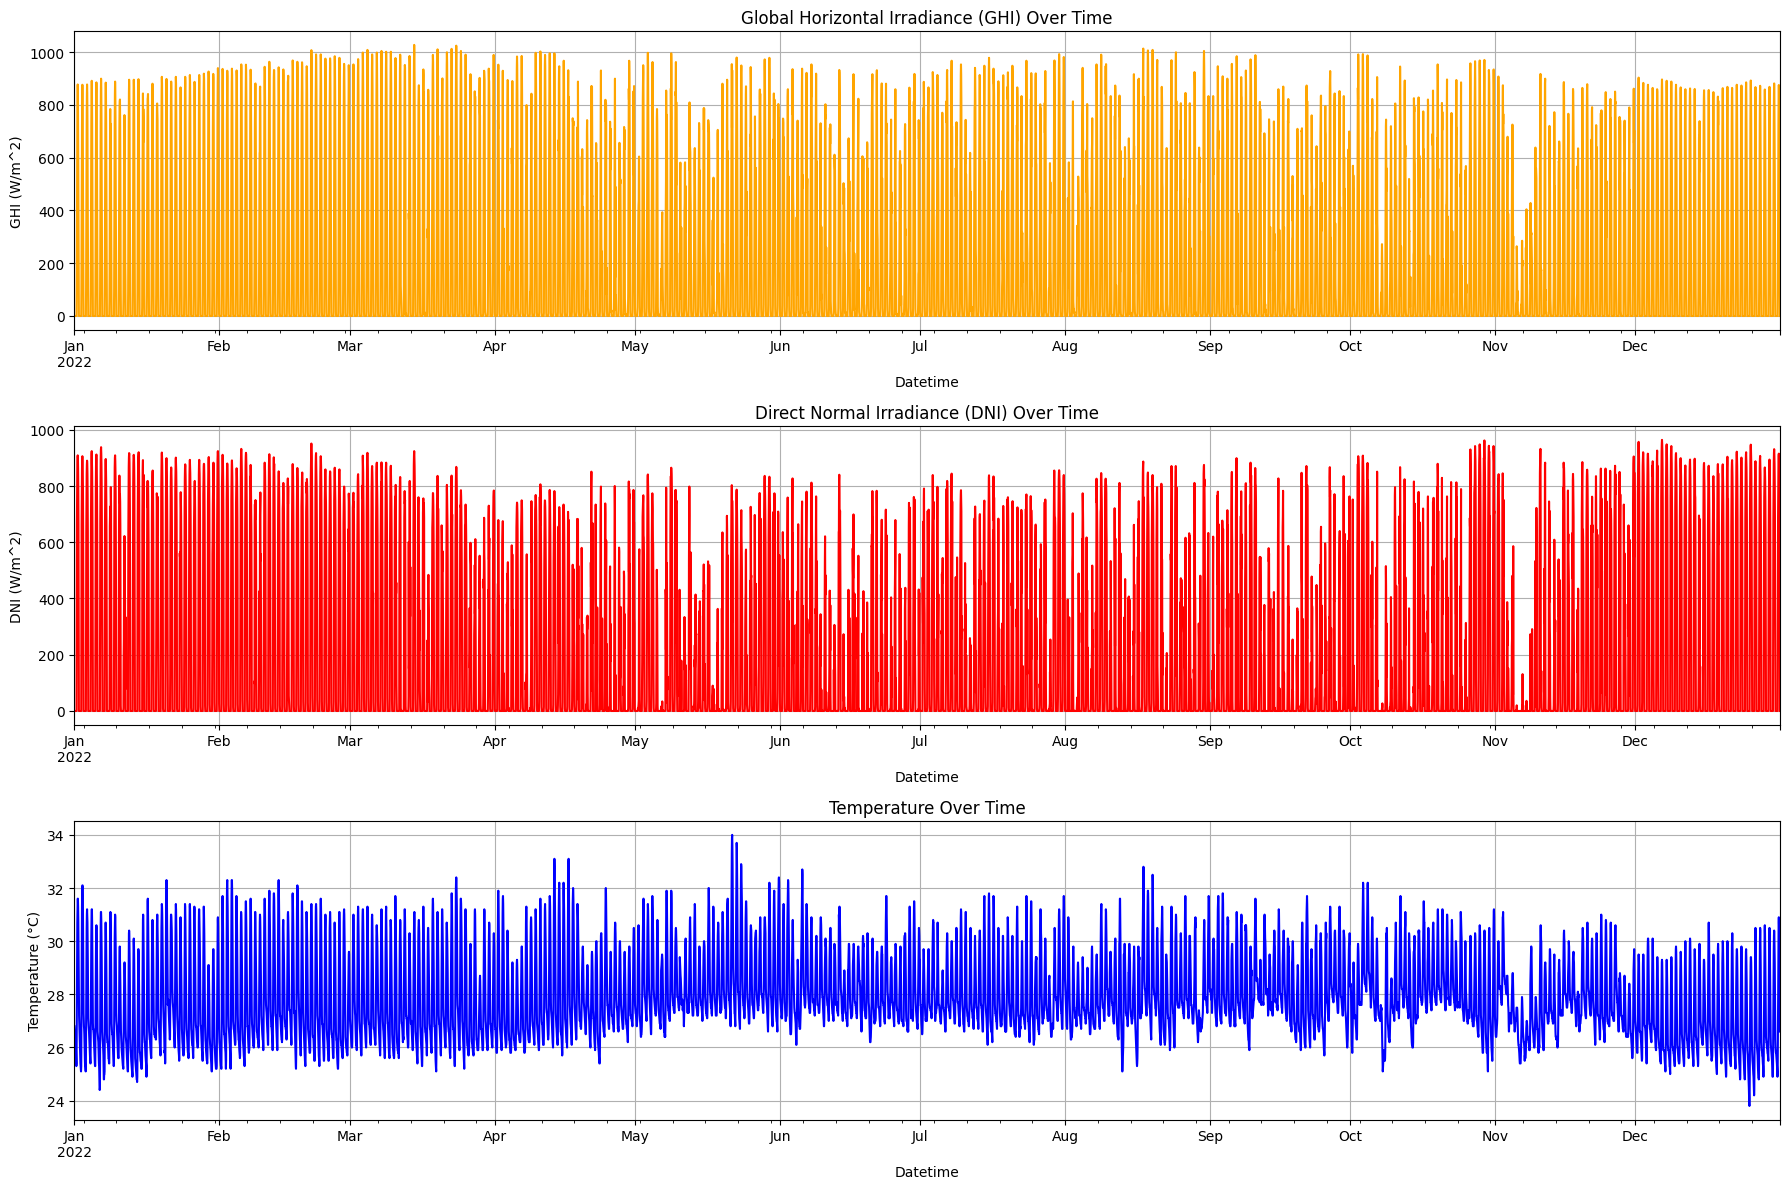

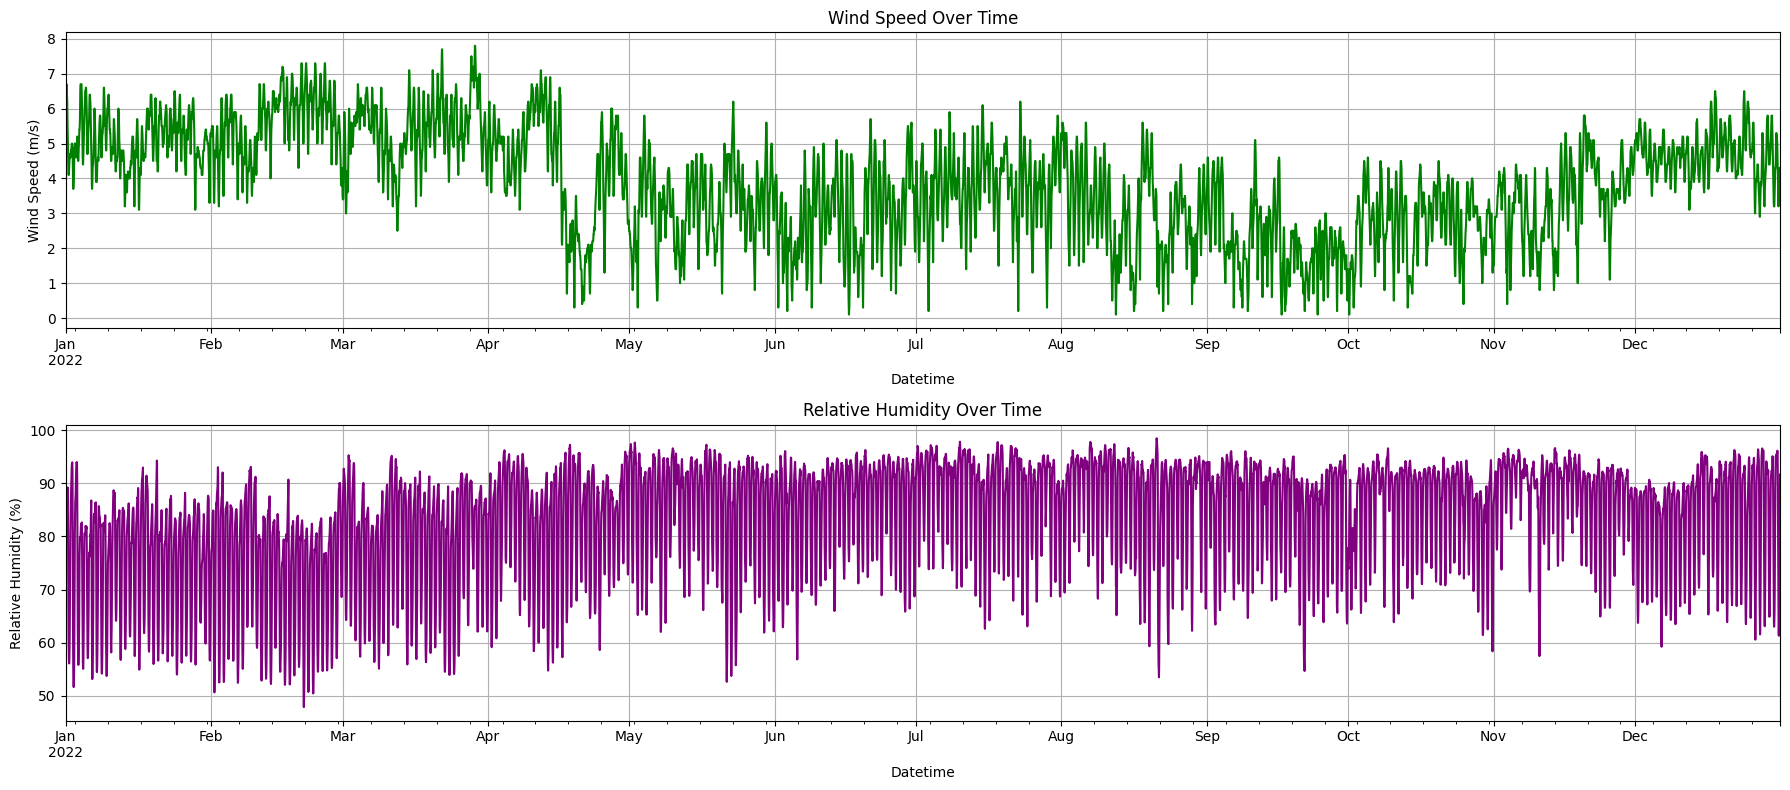

In [17]:
if not df.empty and 'Datetime' in df.index.name:
    # Plotting key solar radiation and meteorological parameters over time
    plt.figure(figsize=(18, 12))

    # GHI (Global Horizontal Irradiance)
    plt.subplot(3, 1, 1)
    df['GHI'].plot(title='Global Horizontal Irradiance (GHI) Over Time', color='orange')
    plt.ylabel('GHI (W/m^2)')
    plt.grid(True)

    # DNI (Direct Normal Irradiance)
    plt.subplot(3, 1, 2)
    df['DNI'].plot(title='Direct Normal Irradiance (DNI) Over Time', color='red')
    plt.ylabel('DNI (W/m^2)')
    plt.grid(True)

    # Temperature
    plt.subplot(3, 1, 3)
    df['Temperature'].plot(title='Temperature Over Time', color='blue')
    plt.ylabel('Temperature (°C)')
    plt.xlabel('Datetime')
    plt.grid(True)

    plt.tight_layout()
    plt.show()

    # Plotting Wind Speed and Relative Humidity
    plt.figure(figsize=(18, 8))

    plt.subplot(2, 1, 1)
    df['Wind Speed'].plot(title='Wind Speed Over Time', color='green')
    plt.ylabel('Wind Speed (m/s)')
    plt.grid(True)

    plt.subplot(2, 1, 2)
    df['Relative Humidity'].plot(title='Relative Humidity Over Time', color='purple')
    plt.ylabel('Relative Humidity (%)')
    plt.xlabel('Datetime')
    plt.grid(True)

    plt.tight_layout()
    plt.show()
else:
    print("DataFrame is empty or 'Datetime' is not set as index, skipping time series plots.")

### 4.2. Univariate Analysis - Distributions
Histograms and density plots help in understanding the distribution of numerical features.


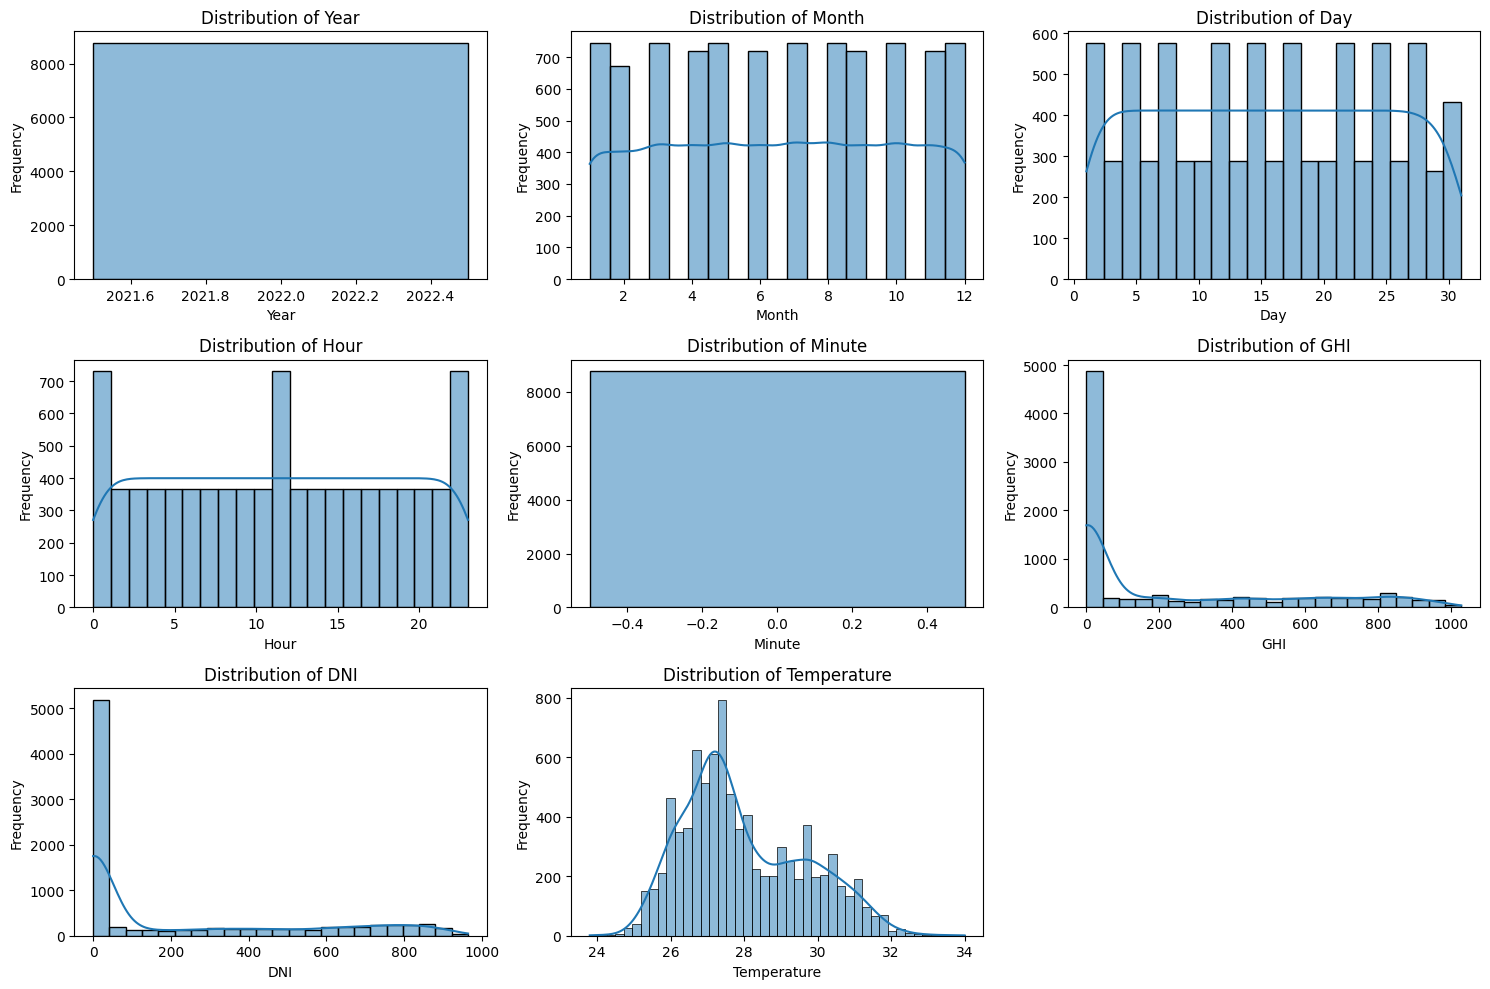

In [25]:
if not df.empty:
    # Histograms for key numerical features
    numerical_cols = basic_columns
    
    plt.figure(figsize=(15, 10))
    for i, col in enumerate(numerical_cols):
        if col in df.columns:
            plt.subplot(3, 3, i + 1)
            sns.histplot(df[col].dropna(), kde=True)
            plt.title(f'Distribution of {col}')
            plt.xlabel(col)
            plt.ylabel('Frequency')
    plt.tight_layout()
    plt.show()
else:
    print("DataFrame is empty, skipping distribution plots.")

## 5. Analysis of Outliers, Correlations, and Seasonality
This section identifies and addresses outliers, explores correlations between key variables, and analyzes seasonal and daily patterns.

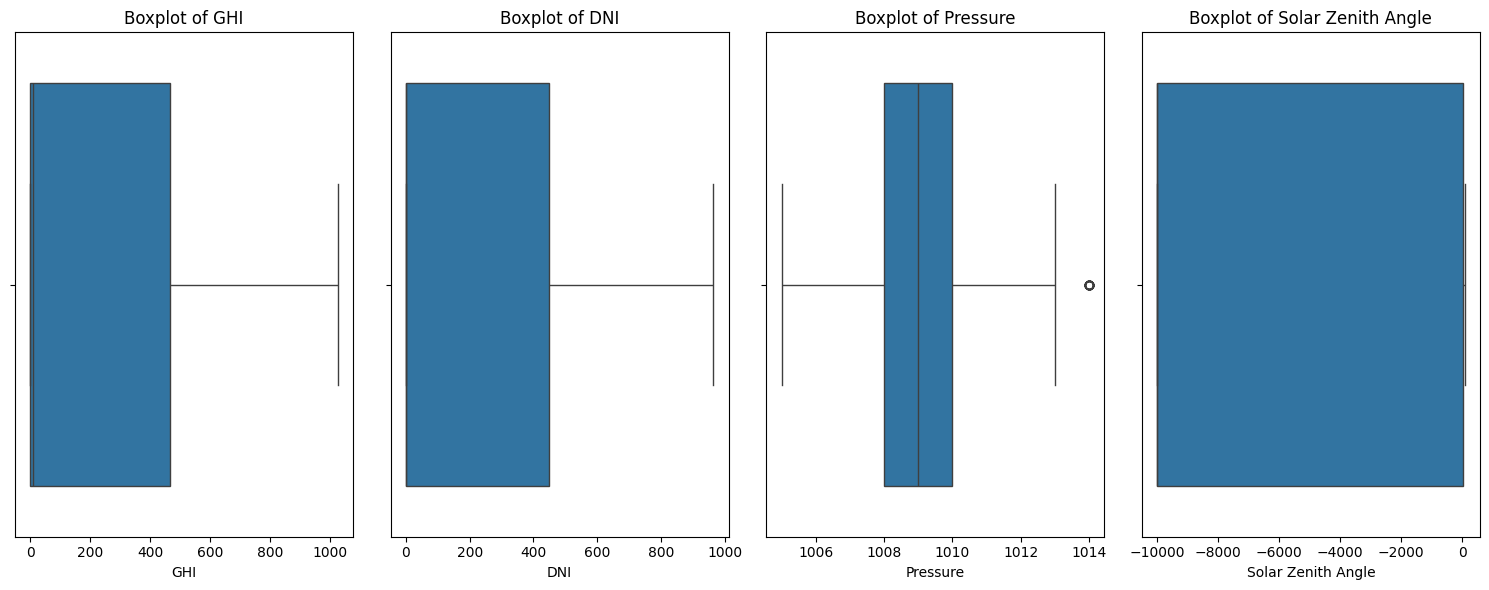

Cleaning rules applied. Outliers converted to NaN.


In [35]:
# Detection of outliers in key variables
import numpy as np
def plot_box_and_outliers(df, columns):
    plt.figure(figsize=(15, 6))
    for i, col in enumerate(columns):
        if col in df.columns:
            plt.subplot(1, len(columns), i + 1)
            sns.boxplot(x=df[col].dropna())
            plt.title(f'Boxplot of {col}')
    plt.tight_layout()
    plt.show()

# Variables to analyze
outlier_cols = ['GHI', 'DNI', 'Pressure', 'Solar Zenith Angle']
plot_box_and_outliers(df, outlier_cols)

# Proposed cleaning rules
# GHI and DNI must be >= 0
# Pressure must be within the typical physical range (980-1050 hPa)
# Solar Zenith Angle must be between 0 and 90 degrees (or NaN if not physical)
df_clean = df.copy()
df_clean.loc[df_clean['GHI'] < 0, 'GHI'] = np.nan
df_clean.loc[df_clean['DNI'] < 0, 'DNI'] = np.nan
df_clean.loc[(df_clean['Pressure'] < 980) | (df_clean['Pressure'] > 1050), 'Pressure'] = np.nan
df_clean.loc[(df_clean['Solar Zenith Angle'] < 0) | (df_clean['Solar Zenith Angle'] > 90), 'Solar Zenith Angle'] = np.nan
print('Cleaning rules applied. Outliers converted to NaN.')

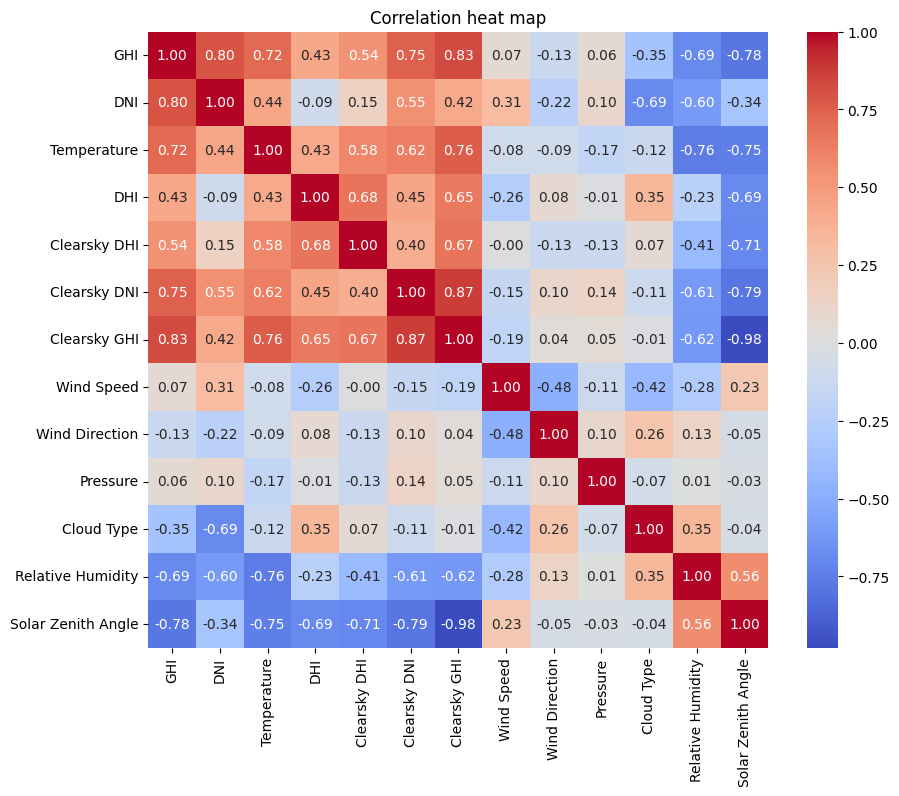

In [32]:
# Analysis of correlations between meteorological variables and solar radiation
corr_cols = basic_columns + other_columns
corr_df = df_clean[corr_cols].dropna()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation heat map')
plt.show()

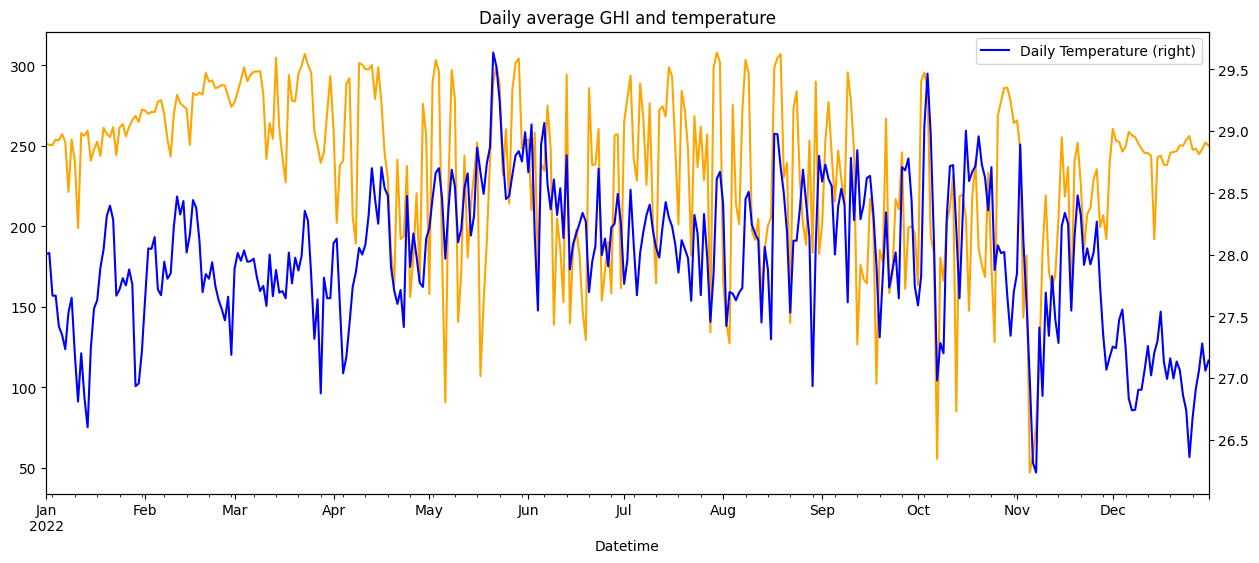

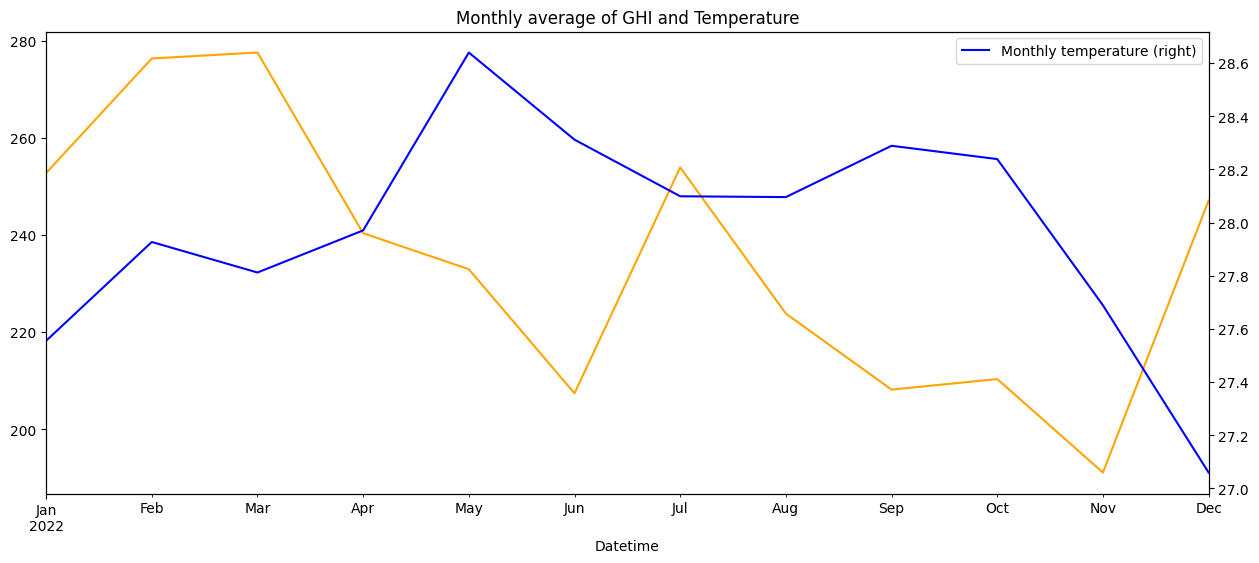

In [37]:
# Analysis of seasonality and daily patterns
if not df_clean.empty and 'Datetime' in df_clean.index.name:
    # Daily average
    daily_mean = df_clean[['GHI', 'Temperature']].resample('D').mean()
    plt.figure(figsize=(15, 6))
    daily_mean['GHI'].plot(label='Daily GHI', color='orange')
    daily_mean['Temperature'].plot(label='Daily Temperature', color='blue', secondary_y=True)
    plt.title('Daily average GHI and temperature')
    plt.legend()
    plt.show()
    # Monthly average
    monthly_mean = df_clean[['GHI', 'Temperature']].resample('ME').mean()
    plt.figure(figsize=(15, 6))
    monthly_mean['GHI'].plot(label='Monthly GHI', color='orange')
    monthly_mean['Temperature'].plot(label='Monthly temperature', color='blue', secondary_y=True)
    plt.title('Monthly average of GHI and Temperature')
    plt.legend()
    plt.show()
else:
    print('Empty or index-less clean DataFrame Datetime.')